<center>
<h1> MV LAB ASSIGNMENT 2 </h1>

Anirudh T, 21BAI1163
</center>

<center>

[LINK TO GITHUB REPOSITORY](https://github.com/OneTrueAnirudh/MV-LAB-2) 

</center>

In [2]:
#import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

# TASK-1: Geometric Rectification of Satellite Imagery

Objective: Correct the geometric distortions in satellite images using bilinear interpolation.

Materials: A distorted satellite image, ground control points (GCPs), and image processing software (such as Python with OpenCV). 

Steps:

- Import the distorted satellite image into the image processing software.

- Identify and mark ground control points (GCPs) on the distorted image.

- Define the corresponding coordinates for the GCPs in the rectified image.

- Apply a transformation matrix to map the distorted image to the corrected coordinates.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Compare the rectified image with the original image to evaluate the effectiveness of the 
rectification process.

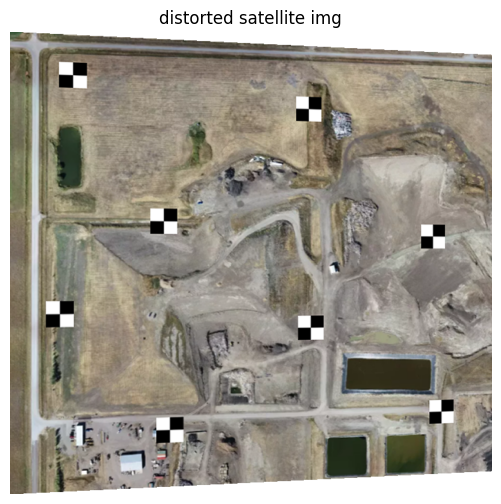

In [126]:
#load distorted satellite image
dist_img = cv2.imread('C:\Trial\MV\images\distorted_satellite_img.png')

#convert bgr to rgb for display in matplotlib
dist_img = cv2.cvtColor(dist_img, cv2.COLOR_BGR2RGB)

#display dist_image
plt.figure(figsize=(8, 6))
plt.imshow(dist_img)
plt.title('distorted satellite img')
plt.axis('off')
plt.show()

In [229]:
#identifying GCPs on the distorted image

pts = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        pts.append((x, y))
cv2.namedWindow("satellite img")
cv2.setMouseCallback("satellite img", select_points)
while True:
    cv2.imshow("satellite img", dist_img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
src_pts = np.array(pts,dtype=np.float32)
print("source points: ", src_pts)

source points:  [[ 99.  66.]
 [657. 316.]
 [670. 591.]
 [249. 619.]]


In [224]:
#define corresponding GCPs in rect_img (target geometry)
dst_pts = np.array([[75,60], [650,315], [675,630], [220,635]],dtype=np.float32)

In [225]:
#compute perspective transformation matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

print("transformation matrix:\n", M)

transformation matrix:
 [[ 9.08503125e-01 -5.65034470e-03 -1.58977761e+01]
 [-3.53394772e-02  9.81815215e-01 -7.29598499e+00]
 [-1.45428435e-04 -5.20817037e-05  1.00000000e+00]]


In [226]:
#get dims of dist_img
h, w = dist_img.shape[:2]

#apply transformation with bilinear interpolation
rect_img = cv2.warpPerspective(dist_img, M, (w, h), flags=cv2.INTER_LINEAR)

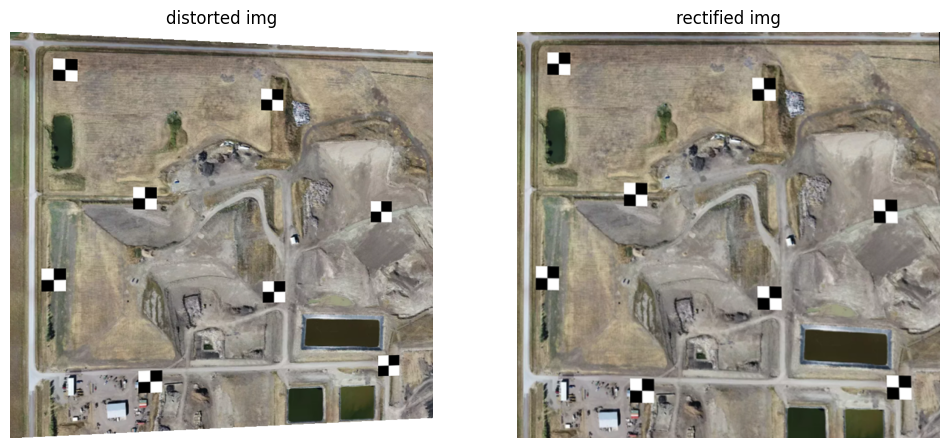

In [227]:
#side-by-side comparison

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(dist_img)
plt.axis('off')
plt.title('distorted img')

plt.subplot(1, 2, 2)
plt.imshow(rect_img)
plt.axis('off')
plt.title('rectified img')

plt.show()

OBSERVATIONS:

- The process mentioned in the task description has been meticulously followed.

- A perspective-distorted satellite image with GCP markers is taken as input, and bilinear interpolation is used to correct the geometric distortion in the image, using the accurate positioning coordinates of the GCPs as reference points for applying the transformation matrix.

- Selecting the pixel coordinates of the GCPs in the distorted image is done via a manual point-and-click interface implemented using OpenCV. The distorted image appears in a window, and the user can click on the center of the required GCP marker. The position of the mouse click relative to the image is registered and the coordinates of the selected pixel is appended to a list of GCP marker coordinates.

- As the correct (un-distorted) coordinates of the GCP markers were not available, a trial-and-error method was used to identify the accurate reference coordinates of the GCP markers (used to calculate the transformation matrix).

- Using bilinear interpolation, the perspective distortion in the satellite image is rectified, and the corrected image is displayed.

# TASK-2: Medical Image Rectification

Objective: Rectify distortions in MRI images using bilinear interpolation. 

Materials: Distorted MRI images, reference anatomical model, and image processing software. 

Steps:

- Import the distorted MRI image into the image processing software.

- Identify and mark key points on the distorted MRI image.

- Obtain the corresponding coordinates from the reference anatomical model.

- Apply a transformation matrix to align the MRI image with the reference model.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Compare the rectified MRI image with the reference model to assess accuracy.

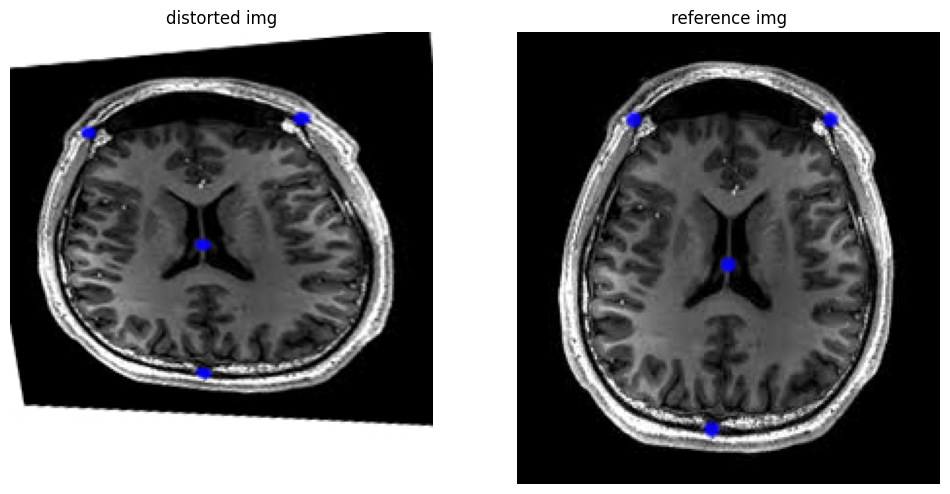

In [300]:
#displaying reference and distorted MRI images (with key points marked)

dist_img=cv2.imread(r'C:\Trial\MV\images\MRI_distorted.jpg')
ref_img=cv2.imread(r'C:\Trial\MV\images\MRI_ref.jpeg')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(dist_img)
plt.axis('off')
plt.title('distorted img')

plt.subplot(1, 2, 2)
plt.imshow(ref_img)
plt.axis('off')
plt.title('reference img')

plt.show()

In [301]:
#identifying  key points on the distorted image

pts = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        pts.append((x, y))
cv2.namedWindow("MRI img", cv2.WINDOW_NORMAL)
cv2.resizeWindow("MRI img", 800, 600)
cv2.setMouseCallback("MRI img", select_points)
while True:
    cv2.imshow("MRI img", dist_img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
src_pts = np.array(pts,dtype=np.float32)
print("source points: ", src_pts)

source points:  [[ 40.  51.]
 [150.  45.]
 [ 99. 109.]
 [100. 175.]]


In [302]:
#identifying key points on the reference image

pts = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        pts.append((x, y))
cv2.namedWindow("MRI img", cv2.WINDOW_NORMAL)
cv2.resizeWindow("MRI img", 800, 600)
cv2.setMouseCallback("MRI img", select_points)
while True:
    cv2.imshow("MRI img", ref_img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
dst_pts = np.array(pts,dtype=np.float32)
print("destination points: ", dst_pts)

destination points:  [[ 60.  44.]
 [161.  44.]
 [108. 119.]
 [100. 203.]]


In [303]:
#compute perspective transformation matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

print("transformation matrix:\n", M)

transformation matrix:
 [[ 1.03027988e+00 -1.71039321e-01  2.81729787e+01]
 [ 9.86769510e-02  1.25137717e+00 -2.32824570e+01]
 [ 6.74302336e-04 -3.12796454e-04  1.00000000e+00]]


In [304]:
#get dims of dist_img
h, w = dist_img.shape[:2]

#apply transformation with bilinear interpolation
rect_img = cv2.warpPerspective(dist_img, M, (w, h), flags=cv2.INTER_LINEAR)

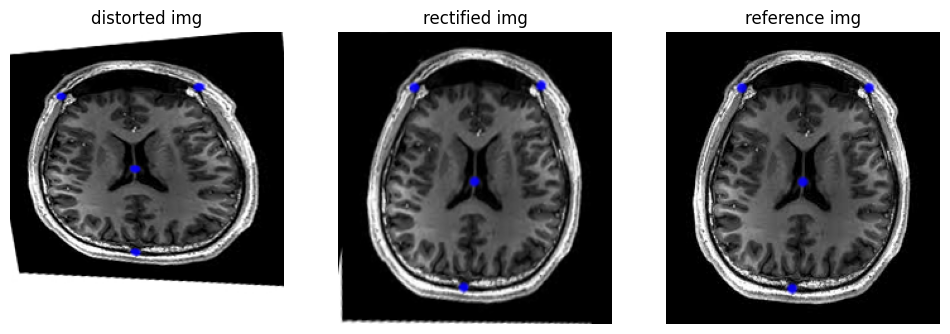

In [305]:
#side-by-side comparison

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(dist_img)
plt.axis('off')
plt.title('distorted img')

plt.subplot(1, 3, 2)
plt.imshow(rect_img)
plt.axis('off')
plt.title('rectified img')

plt.subplot(1, 3, 3)
plt.imshow(ref_img)
plt.axis('off')
plt.title('reference img')

plt.show()

OBSERVATIONS:

- an MRI reference image (brain scan) is obtained, and 4 key points are marked.

- a distorted version of thee MRI image (with corresponding key points marked) is imported into the editor.

- we can observe that perspective and skew distortions are present in the image.

- as above, the pixel coordinates of the key areas in both distorted and reference images are obtained via the point-and-click GUI implemented earlier. 

- the source and destination pixel mappings are used to calculate the transformation matrix.

- a perspective transform is best suited to remove the distortions present in the above MRI image. The transformation is applied to the image, and bilinear interpolation is used to resample the pixels.

- the rectified image thus obtained is compared with the original distorted image and ideal reference image.

# TASK-3: Drone Image Rectification

Objective: Correct the geometric distortions in drone-captured images of an agricultural field using bilinear interpolation. 

Materials: Distorted drone images, control points from known field locations, and image processing software. 

Steps:

- Import the distorted drone image into the image processing software.

- Identify and mark control points on the distorted image.

- Define the corresponding coordinates for the control points in the rectified image.

- Apply a transformation matrix to map the distorted image to the corrected coordinates.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Generate an orthophoto of the field and compare it with the original image.


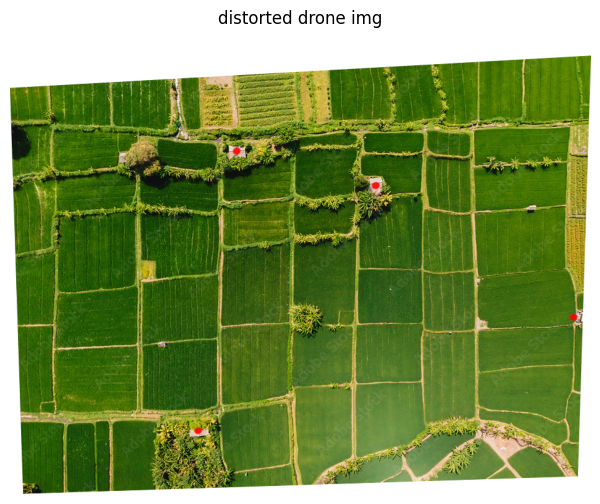

In [306]:
#load distorted drone image
dist_img = cv2.imread('C:\Trial\MV\images\distorted_drone_img.jpg')

#convert bgr to rgb for display in matplotlib
dist_img = cv2.cvtColor(dist_img, cv2.COLOR_BGR2RGB)

#display dist_image
plt.figure(figsize=(8, 6))
plt.imshow(dist_img)
plt.title('distorted drone img')
plt.axis('off')
plt.show()

In [307]:
#identifying CPs on the distorted image

pts = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        pts.append((x, y))
cv2.namedWindow("drone img", cv2.WINDOW_NORMAL)
cv2.resizeWindow("drone img", 800, 600)
cv2.setMouseCallback("drone img", select_points)
while True:
    cv2.imshow("drone img", dist_img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
src_pts = np.array(pts,dtype=np.float32)
print("source points: ", src_pts)

source points:  [[368. 193.]
 [592. 247.]
 [912. 462.]
 [306. 643.]]


In [308]:
#define corresponding CPs in rect_img (target geometry)
dst_pts = np.array([[376,131], [603,207], [930,467], [306,639]],dtype=np.float32)

In [309]:
#compute perspective transformation matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

print("transformation matrix:\n", M)

transformation matrix:
 [[ 1.03403766e+00 -4.44614996e-02  3.09504521e+00]
 [ 8.44559414e-02  1.07129782e+00 -1.07174791e+02]
 [ 4.43108897e-05 -9.77203900e-05  1.00000000e+00]]


In [310]:
#get dims of dist_img
h, w = dist_img.shape[:2]

#apply transformation with bilinear interpolation
rect_img = cv2.warpPerspective(dist_img, M, (w, h), flags=cv2.INTER_LINEAR)

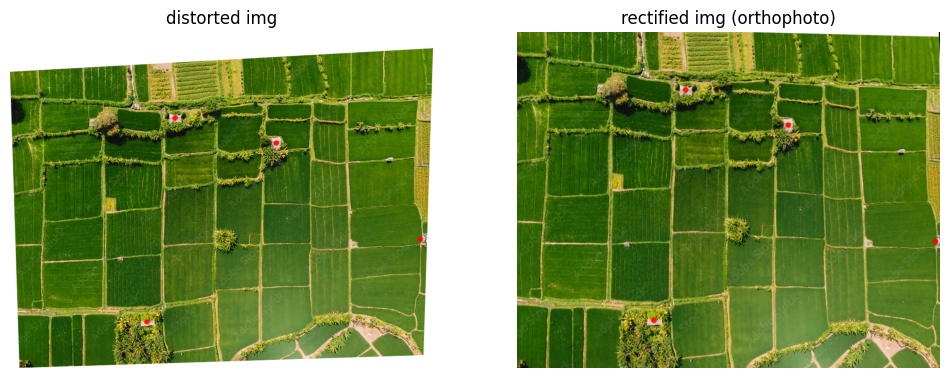

In [311]:
#side-by-side comparison

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(dist_img)
plt.axis('off')
plt.title('distorted img')

plt.subplot(1, 2, 2)
plt.imshow(rect_img)
plt.axis('off')
plt.title('rectified img (orthophoto)')

plt.show()

OBSERVATIONS:

- The process mentioned in the task description has been meticulously followed.

- A perspective-distorted drone image with CP markers is taken as input, and bilinear interpolation is used to correct the geometric distortion in the image, using the accurate positioning coordinates of the CPs as reference points for applying the transformation matrix.

- Selecting the pixel coordinates of the CPs in the distorted image is done via a manual point-and-click interface implemented using OpenCV. The distorted image appears in a window, and the user can click on the center of the required CP marker. The position of the mouse click relative to the image is registered and the coordinates of the selected pixel is appended to a list of CP marker coordinates.

- As the correct (un-distorted) coordinates of the CP markers were not available, a trial-and-error method was used to identify the accurate reference coordinates of the CP markers (used to calculate the transformation matrix).

- Using bilinear interpolation, the perspective distortion in the drone image is rectified, and the corrected image is displayed.

# TASK-4: Historical Photo Restoration

Objective: Rectify and restore old, distorted photographs using bilinear interpolation. 

Materials: Scanned old photographs, reference images, and image processing software. 

Steps:

- Import the scanned old photograph into the image processing software.

- Identify and mark key points on the distorted photograph.

- Obtain the corresponding coordinates from a reference image or known dimensions.

- Apply a transformation matrix to align the distorted photograph with the reference 
coordinates.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Compare the rectified photograph with the original scanned image and the reference image.


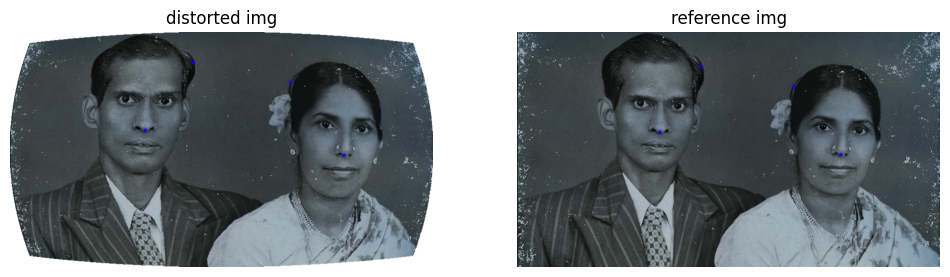

In [47]:
#displaying reference and distorted architectural images (with key points marked)

dist_img=cv2.imread(r'C:\Trial\MV\images\historic_photo_distorted.jpg')
ref_img=cv2.imread(r'C:\Trial\MV\images\historic_photo.jpg')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(dist_img)
plt.axis('off')
plt.title('distorted img')

plt.subplot(1, 2, 2)
plt.imshow(ref_img)
plt.axis('off')
plt.title('reference img')

plt.show()

In [48]:
#approximate camera matrix

h, w = dist_img.shape[:2]
cam_matrix = np.array([[w, 0, w / 2], [0, h, h / 2], [0, 0, 1]], dtype=np.float32)

#distortion coefficients for fish-eye/barrel distortion effect

dist_coeffs = np.array([-0.4, 0.1, 0, 0, 0], dtype=np.float32)

In [49]:
#compute undistortion and rectification transformation map

new_cam_matrix, _ = cv2.getOptimalNewCameraMatrix(cam_matrix, dist_coeffs, (w, h), 1, (w, h))
map1, map2 = cv2.initUndistortRectifyMap(cam_matrix, dist_coeffs, None, new_cam_matrix, (w, h), cv2.CV_32FC1)

#apply remap with bilinear interpolation

rect_img = cv2.remap(dist_img, map1, map2, interpolation=cv2.INTER_LINEAR)

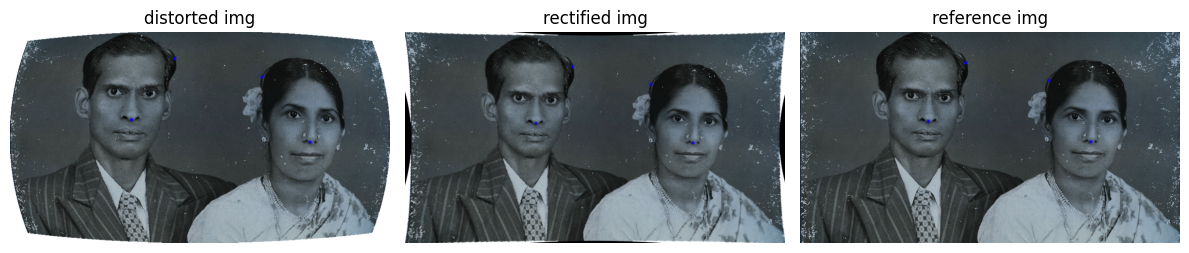

In [51]:
#side-by-side comparison

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(dist_img)
plt.axis('off')
plt.title('distorted img')

#cropping rect_img before plotting for neater presentation

x_start, y_start = 79, 44 
x_end, y_end = 820, 454 
rect_img_crop = rect_img[y_start:y_end,x_start:x_end,]
plt.subplot(1, 3, 2)
plt.imshow(rect_img_crop)
plt.axis('off')
plt.title('rectified img')

plt.subplot(1, 3, 3)
plt.imshow(ref_img)
plt.axis('off')
plt.title('reference img')

plt.tight_layout()
plt.show()

OBSERVATIONS:

The historical photo used here contains fish-eye distortion, otherwise known as a barrel distortion. This is a radial distortion that causes the image to be stretched outward. To fix barrel distortion in the image, the following process is followed:

- Camera Matrix: This 3x3 matrix contains intrinsic camera parameters, such as focal lengths f_x and f_y and the principal point (c_x, c_y), which are used to project 3D points onto the 2D image. These parameters help in transforming distorted images back to their undistorted form.

    since the actual values are unavailable, we can use approximations:

    f_x=w, f_y=h

    c_x=w/2, c_y=h/2

    the final row in the matrix, [0 0 1], makes it a homogeneous transformation matrix, which is needed for the mathematics of 3D-to-2D projection.

- Distortion Coefficients: These describe how much the lens distorts the image. The first coefficient, k1, is the most significant for radial distortion. Negative values indicate barrel distortion, where the image bulges outward.

    Through trial-and-error, the value of k1=-0.4 was determined as the optimal coefficient to minimize barrel distortion in the photo, bringing it closest to an undistorted state.

- Undistortion Process: Using OpenCV’s cv2.initUndistortRectifyMap() and cv2.remap(), the camera matrix and distortion coefficients are applied to correct the distorted photo. Bilinear interpolation is used to resample the pixels for smoothness.

# TASK-5: Architectural Image Rectification

Objective: Rectify perspective distortions in architectural images using bilinear interpolation. 

Materials: Distorted architectural images, known dimensions of the building, and image processing software. 

Steps:

- Import the distorted architectural image into the image processing software.

- Identify and mark key points on the distorted image corresponding to known dimensions of the building.

- Define the corresponding coordinates for these points in the rectified image.

- Apply a transformation matrix to align the distorted image with the known dimensions.

- Use bilinear interpolation to resample the pixel values in the rectified image.

- Compare the rectified image with the original distorted image to evaluate the correction.


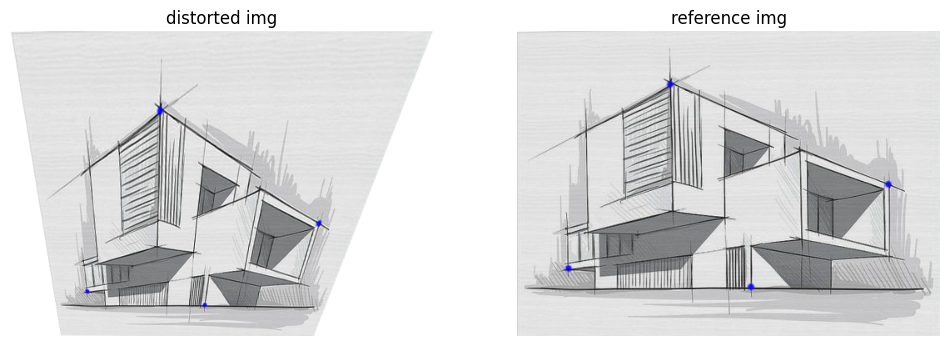

In [170]:
#displaying reference and distorted architectural images (with key points marked)

dist_img=cv2.imread(r'C:\Trial\MV\images\arch_img_distorted.jpg')
ref_img=cv2.imread(r'C:\Trial\MV\images\arch_img_ref.jpg')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(dist_img)
plt.axis('off')
plt.title('distorted img')

plt.subplot(1, 2, 2)
plt.imshow(ref_img)
plt.axis('off')
plt.title('reference img')

plt.show()

In [171]:
#identifying  key points on the distorted image

pts = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        pts.append((x, y))
cv2.namedWindow("architectural img", cv2.WINDOW_NORMAL)
cv2.resizeWindow("architectural img", 800, 600)
cv2.setMouseCallback("architectural img", select_points)
while True:
    cv2.imshow("architectural img", dist_img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
src_pts = np.array(pts,dtype=np.float32)
print("source points: ", src_pts)

source points:  [[180.  96.]
 [372. 231.]
 [234. 328.]
 [ 93. 312.]]


In [172]:
#identifying key points on the reference image

pts = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        pts.append((x, y))
cv2.namedWindow("architectural img", cv2.WINDOW_NORMAL)
cv2.resizeWindow("architectural img", 800, 600)
cv2.setMouseCallback("architectural img", select_points)
while True:
    cv2.imshow("architectural img", ref_img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
dst_pts = np.array(pts,dtype=np.float32)
print("destination points: ", dst_pts)

destination points:  [[184.  64.]
 [446. 184.]
 [281. 306.]
 [ 63. 284.]]


In [173]:
#compute perspective transformation matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

print("transformation matrix:\n", M)

transformation matrix:
 [[ 9.99117406e-01 -1.69836840e-01  1.27942135e+00]
 [ 3.13912303e-04  5.94741143e-01  1.75726155e-01]
 [ 1.43432478e-05 -1.11293198e-03  1.00000000e+00]]


In [174]:
#get dims of dist_img
h, w = dist_img.shape[:2]

#apply transformation with bilinear interpolation
rect_img = cv2.warpPerspective(dist_img, M, (w, h), flags=cv2.INTER_LINEAR)

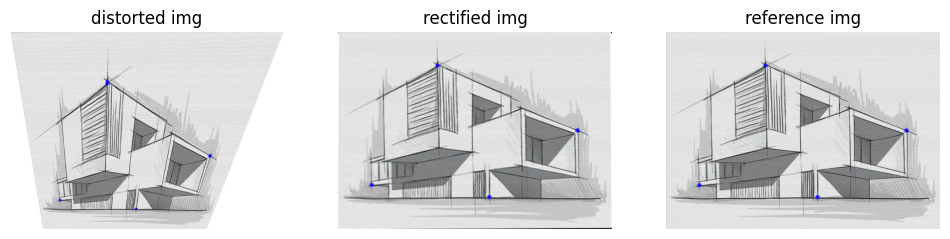

In [175]:
#side-by-side comparison

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(dist_img)
plt.axis('off')
plt.title('distorted img')

plt.subplot(1, 3, 2)
plt.imshow(rect_img)
plt.axis('off')
plt.title('rectified img')

plt.subplot(1, 3, 3)
plt.imshow(ref_img)
plt.axis('off')
plt.title('reference img')

plt.show()

OBSERVATIONS:

- an architectural reference image is obtained, and 4 key points are marked.

- a distorted version of the image (with corresponding key points marked) is imported into the editor.

- we can observe that significant perspective and skew distortions are present in the image.

- as above, the pixel coordinates of the key areas in both distorted and reference images are obtained via the point-and-click GUI implemented earlier. 

- the source and destination pixel mappings are used to calculate the transformation matrix.

- a perspective transform is best suited to remove the distortions present in the above architectural image. The transformation is applied to the image, and bilinear interpolation is used to resample the pixels.

- the rectified image thus obtained is compared with the original distorted image and ideal reference image.